[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


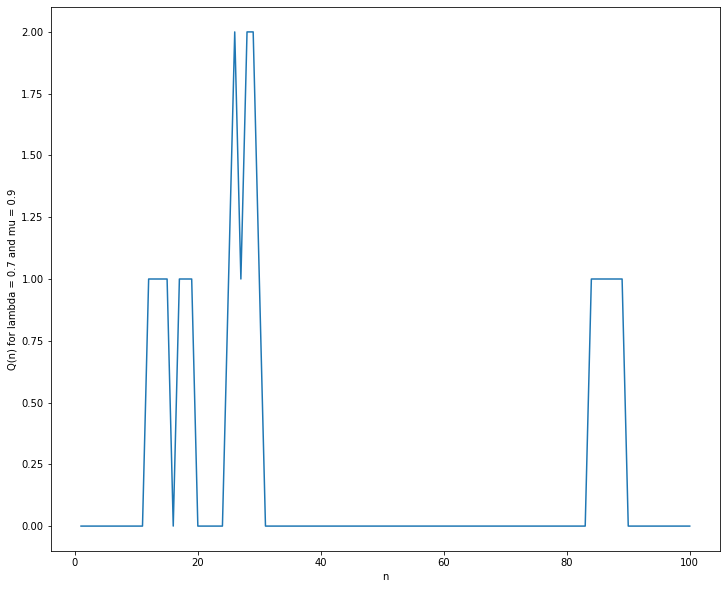

[0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 3, 3, 3, 3, 4, 4, 4, 5, 6, 6, 5, 5, 5, 5, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 9, 10, 10, 10, 10, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 13, 14, 14, 15, 16, 16, 16, 17, 18]


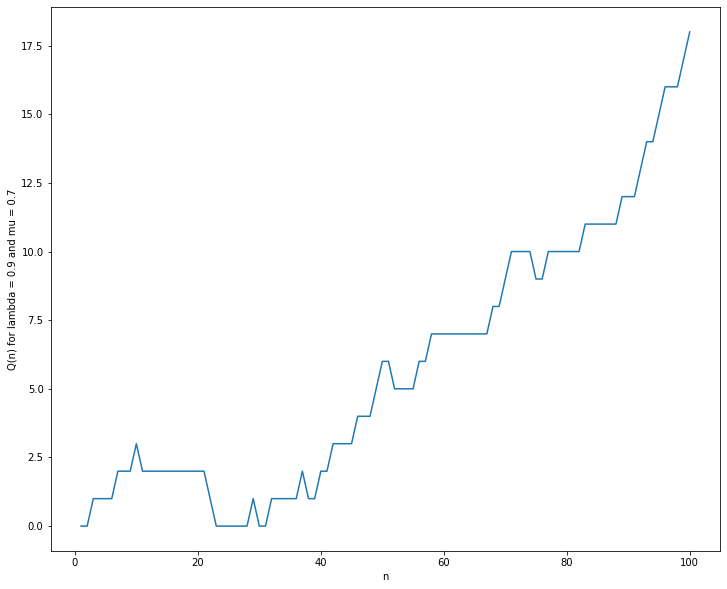

[19, 18, 19, 19, 19, 20, 19, 18, 18, 19, 20, 20, 21, 21, 21, 21, 22, 22, 22, 23, 23, 23, 24, 23, 22, 21, 21, 20, 20, 20, 19, 18, 18, 17, 17, 18, 19, 18, 18, 18, 18, 19, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 17, 17, 17, 17, 17, 17, 17, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 17, 16, 16, 17, 17, 17, 16, 15, 14, 13, 13, 13, 13, 12, 13, 12, 11, 10, 10, 10, 11, 11, 10, 10, 10, 9]


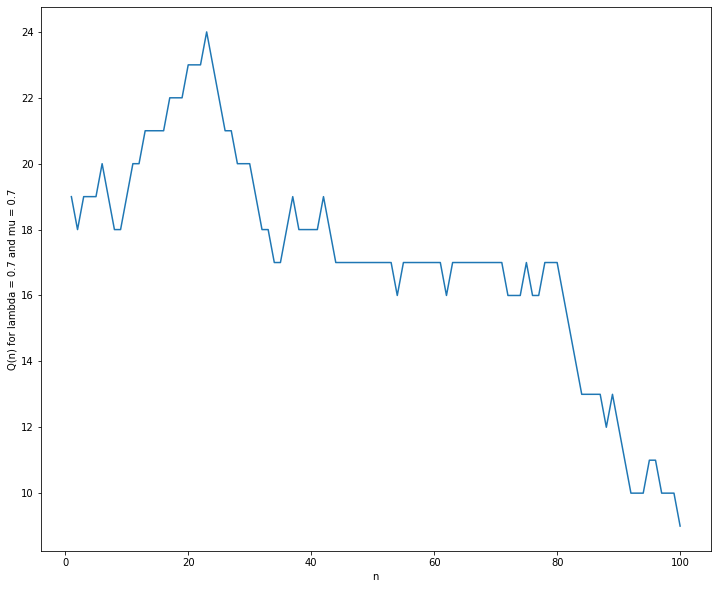

In [13]:
import random
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 12,10

def Q(n, mu, la):
    p1 = la*(1-mu)
    p2 = (1-la)*mu
    p3 = (1-mu)*(1-la) + la*mu
    a = random.random()

    if(a>=0 and a<=p1):
        return n+1
    elif(a>p1 and a<=p1+p2):
        return max(n-1,0)
    else:
        return n


n = 0
mus = [0.9,0.7,0.7]
las = [0.7,0.9,0.7]

for i in range(len(mus)):
    mu=mus[i]
    la=las[i]

    values = []
    for i in range(100):
        n = Q(n,mu,la)
        values += [n]

    print(values)
    plt.plot(range(1,101),values)
    plt.ylabel(f"Q(n) for lambda = {la} and mu = {mu}")
    plt.xlabel("n")
    plt.show()
